In [3]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import json
from typing import Dict

from womad_feedback.align import ImageAligner


In [14]:
def read_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)

def plot_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title('Image')
    plt.axis('off')
    plt.show()

def read_image_and_metadata(session_id, image_id):
    image_path = data_path / f"{session_id}/00 - source images/{image_id}.png"
    image = read_image(image_path)

    image_metadata_path = image_path.with_suffix(".json")
    image_metadata_path = image_metadata_path.parent.parent / "10 - locations" / image_metadata_path.name
    image_metadata = json.loads(image_metadata_path.read_text())

    return image, image_metadata
    
data_path = Path("./input/womad - 2024/analysis")
assets_path = data_path / "assets"

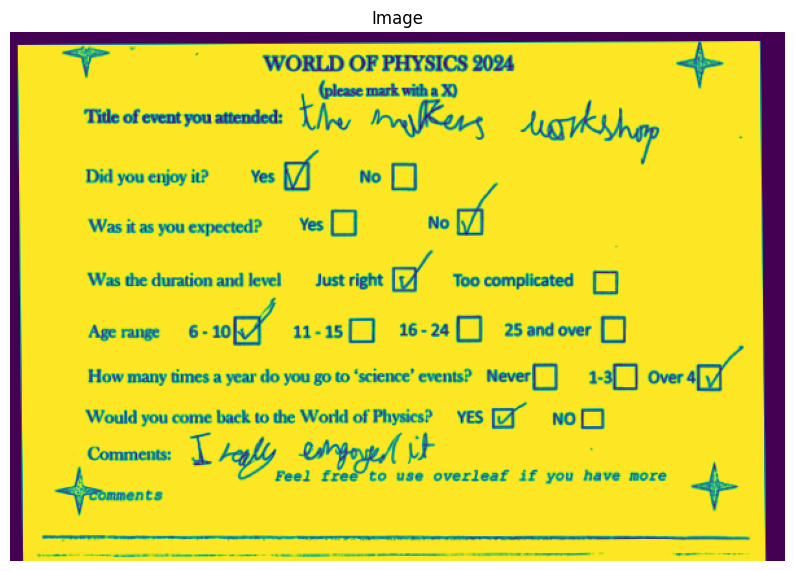

In [15]:
aligner = ImageAligner()
aligner.add_base_image("base", read_image(assets_path / "alignment" / "blank.png"))

orig = read_image(data_path / "000" / "00 - source images" / "007.png" )
aligned = aligner.align(orig, "base")

plot_image(aligned)


In [16]:
for session_path in sorted(data_path.glob("0??")):
    source_path = session_path / "00 - source images"
    target_path = session_path / "40 - align"
    target_path.mkdir(exist_ok=True, parents=True)

    for image_path in sorted(source_path.glob("???.png")):
        print(session_path.name, image_path.stem)
        image, md = read_image_and_metadata(session_path.name, image_path.stem)
        if "stars" in md:
            aligned = aligner.align(image, "base")
        else:
            aligned = image
        target_image_path = target_path / image_path.name
        cv2.imwrite(target_image_path, aligned)

000 001
000 002
000 003
000 004
000 005
000 006
000 007
000 008
000 009
000 010
000 011
000 012
000 013
000 014
000 015
000 016
000 017
000 018
001 001
001 002
001 003
001 004
001 005
001 006
001 007
001 008
001 009
001 010
001 011
001 012
001 013
001 014
001 015
001 016
001 017
001 018
001 019
002 001
002 002
003 001
003 002
003 003
003 004
003 005
003 006
003 007
003 008
003 009
003 010
003 011
003 012
003 013
003 014
003 015
003 016
003 017
003 018
003 019
003 020
003 021
003 022
003 023
003 024
003 025
003 026
003 027
003 028
003 029
003 030
003 031
003 032
003 033
003 034
003 035
003 036
003 037
003 038
003 039
003 040
003 041
003 042
003 043
003 044
003 045
004 001
004 002
004 003
004 004
004 005
004 006
004 007
004 008
004 009
004 010
004 011
004 012
004 013
004 014
004 015
004 016
004 017
004 018
004 019
004 020
004 021
004 022
004 023
004 024
004 025
004 026
004 027
004 028
004 029
004 030
004 031
004 032
004 033
004 034
004 035
004 036
004 037
004 038
004 039
004 040
004 041


In [ ]:


def read_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)

def to_coordinate(obj):
    return (obj['y'], obj['x'])


def align(image, md):
    md = md.copy()

    stars = md.pop("stars")
    md.update(**stars)

    # overleaf = md.get("overleaf")
    # bottom_right = md.get("bottom_right")
    # if not overleaf or not bottom_right:
    #     target = target_name = "left"
    # else:
    #     bottom_right = md.get("bottom_right")
    #     distance = bottom_right["x"] - overleaf["x"]
    #     target_name = "left" if distance > 100 else "right"

    target_name = "left"
    print("  Using target", target_name)
    target_l = target_locations['left']
    target_r = target_locations['right']


    sources = []
    targets_l = []
    targets_r = []
    for key in md:
        if key in target_l:
            sources.append(to_coordinate(md[key]))
            targets_l.append(to_coordinate(target_l[key]))
            targets_r.append(to_coordinate(target_r[key]))

    sources = np.float32(sources).reshape(-1, 1, 2)
    targets_l = np.float32(targets_l).reshape(-1, 1, 2)
    targets_r = np.float32(targets_r).reshape(-1, 1, 2)

    if len(sources) < 4:
        print("Too few matches")
        return image

    HL, _ = cv2.findHomography(sources, targets_l, cv2.RANSAC, 5.0)
    HR, _ = cv2.findHomography(sources, targets_r, cv2.RANSAC, 5.0)


    w, h = image.shape
    result_image = cv2.warpPerspective(image, H, (650, 450))

    return result_image

def read_image_and_metadata(session_id, image_id):
    image_path = data_path / f"{session_id}/00 - source images/{image_id}.png"
    image = read_image(image_path)

    image_metadata_path = image_path.with_suffix(".json")
    image_metadata_path = image_metadata_path.parent.parent / "10 - locations" / image_metadata_path.name
    image_metadata = json.loads(image_metadata_path.read_text())

    return image, image_metadata




  Using target left


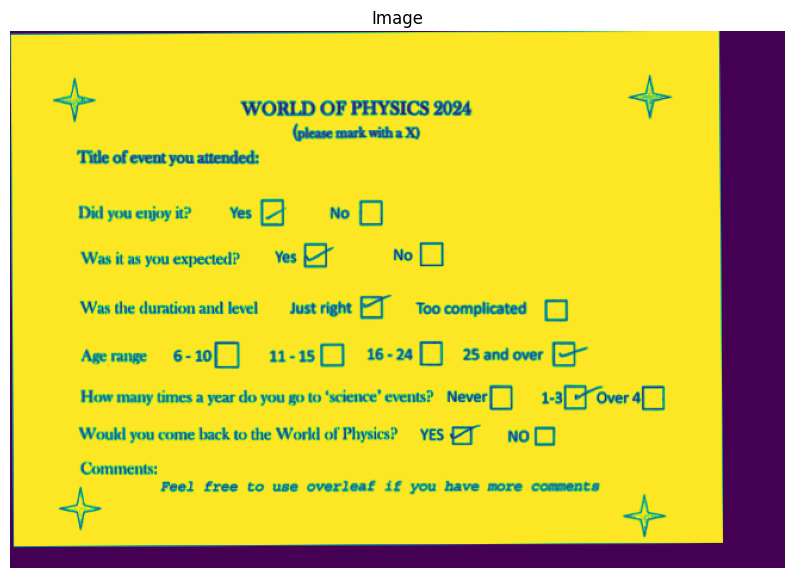

In [ ]:

image, md = read_image_and_metadata("003", "006")
if "stars" in md:
    result_image = align(image, md)
    plot_image(result_image)



In [ ]:
for session_path in sorted(data_path.glob("0??")):
    source_path = session_path / "00 - source images"
    target_path = session_path / "40 - align"
    target_path.mkdir(exist_ok=True, parents=True)

    for image_path in sorted(source_path.glob("???.png")):
        print(session_path.name, image_path.stem)
        image, md = read_image_and_metadata(session_path.name, image_path.stem)
        if "stars" in md:
            image = align(image, md)
        
        target_image_path = target_path / image_path.name
        cv2.imwrite(target_image_path, image)


000 001
000 002
  Using target left
000 003
  Using target left
000 004
  Using target left
000 005
  Using target left
000 006
  Using target left
000 007
  Using target left
000 008
  Using target left
000 009
  Using target left
000 010
  Using target left
000 011
  Using target left
000 012
  Using target left
000 013
  Using target left
000 014
  Using target left
000 015
  Using target left
000 016
  Using target left
000 017
  Using target left
000 018
  Using target left
001 001
001 002
  Using target left
001 003
  Using target left
001 004
  Using target left
001 005
  Using target left
Too few matches
001 006
  Using target left
001 007
  Using target left
001 008
  Using target left
001 009
  Using target left
001 010
  Using target left
001 011
  Using target left
001 012
  Using target left
001 013
  Using target left
001 014
  Using target left
001 015
  Using target left
001 016
  Using target left
001 017
  Using target left
001 018
  Using target left
Too few matches


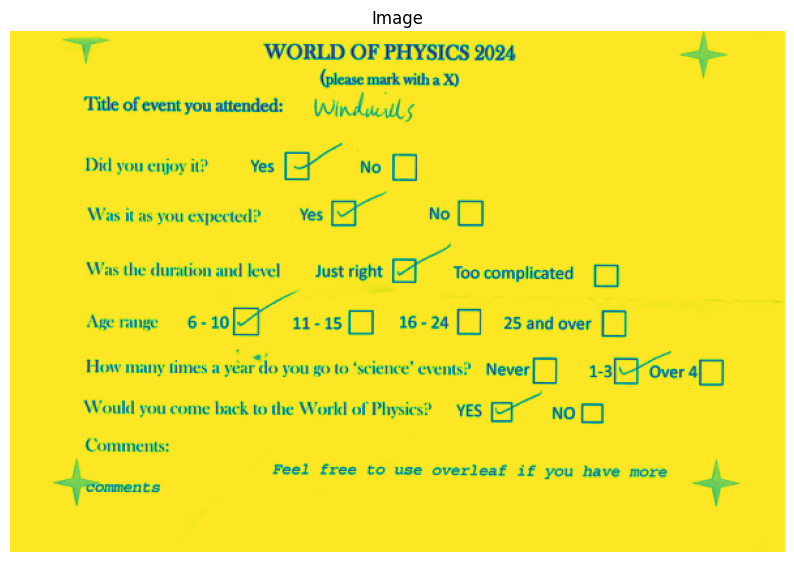

{'stars': {'bottom_right': {'y': 540.75, 'x': 345.0},
  'bottom_left': {'y': 531.0, 'x': 17.0},
  'top_left': {'y': 58.0, 'x': 6.0},
  'top_right': {'y': 51.0, 'x': 345.0}},
 'age': {'x': 215.0, 'y': 56.5, 'h': 16, 'w': 60},
 'enjoy': {'x': 95.5, 'y': 56.0, 'h': 16, 'w': 100},
 'expected': {'x': 135.0, 'y': 59.0, 'h': 15, 'w': 139},
 'overleaf': {'x': 331.0, 'y': 294.0, 'h': 11, 'w': 88},
 'science_events': {'x': 252.0, 'y': 263.0, 'h': 11, 'w': 90},
 'wop': {'x': 9.5, 'y': 195.0, 'h': 12, 'w': 192},
 'title': {'x': 49.5, 'y': 57.0, 'h': 12, 'w': 75},
 '25over': {'x': 218.5, 'y': 378.0, 'h': 11, 'w': 77},
 'over4': {'x': 255.5, 'y': 490.0, 'h': 10, 'w': 41},
 'session': '000',
 'image_seq': '003'}

In [ ]:
# Explore skewed image

image, md = read_image_and_metadata("000", "003")
plot_image(image)

md

In [ ]:
my_md = md.copy()
my_md.update(**my_md.pop("stars"))
# del my_md['title']
# del my_md['session']

my_md


{'age': {'x': 215.0, 'y': 56.5, 'h': 16, 'w': 60},
 'enjoy': {'x': 95.5, 'y': 56.0, 'h': 16, 'w': 100},
 'expected': {'x': 135.0, 'y': 59.0, 'h': 15, 'w': 139},
 'overleaf': {'x': 331.0, 'y': 294.0, 'h': 11, 'w': 88},
 'science_events': {'x': 252.0, 'y': 263.0, 'h': 11, 'w': 90},
 'wop': {'x': 9.5, 'y': 195.0, 'h': 12, 'w': 192},
 'title': {'x': 49.5, 'y': 57.0, 'h': 12, 'w': 75},
 '25over': {'x': 218.5, 'y': 378.0, 'h': 11, 'w': 77},
 'over4': {'x': 255.5, 'y': 490.0, 'h': 10, 'w': 41},
 'session': '000',
 'image_seq': '003',
 'bottom_right': {'y': 540.75, 'x': 345.0},
 'bottom_left': {'y': 531.0, 'x': 17.0},
 'top_left': {'y': 58.0, 'x': 6.0},
 'top_right': {'y': 51.0, 'x': 345.0}}

In [ ]:
target_l = target_locations['left']
target_r = target_locations['right']

sources = []
targets_l = []
targets_r = []
for key in md:
    if key in target_l:
        sources.append(to_coordinate(md[key]))
        targets_l.append(to_coordinate(target_l[key]))
        targets_r.append(to_coordinate(target_r[key]))

sources = np.float32(sources).reshape(-1, 1, 2)
targets_l = np.float32(targets_l).reshape(-1, 1, 2)
targets_r = np.float32(targets_r).reshape(-1, 1, 2)

display(sources)
display(targets_l)
display(targets_r)

array([], shape=(0, 1, 2), dtype=float32)

array([], shape=(0, 1, 2), dtype=float32)

array([], shape=(0, 1, 2), dtype=float32)

In [ ]:


def annotate_image(target_image, points: Dict = None):
    target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)
    for pt in points.values():
        if isinstance(pt, dict):
            cv2.circle(target_image, (int(pt['y']), int(pt['x'])), 2, (255,0,0), 2)
    return target_image

HL, _ = cv2.findHomography(sources, targets_l, cv2.RANSAC, 5.0)
HR, _ = cv2.findHomography(sources, targets_r, cv2.RANSAC, 5.0)

display(HL)
display(HR)

error: OpenCV(4.10.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/calib3d/src/fundam.cpp:390: error: (-28:Unknown error code -28) The input arrays should have at least 4 corresponding point sets to calculate Homography in function 'findHomography'


In [ ]:

result_image = cv2.warpPerspective(image, HL, (650, 450))
result_image = annotate_image(image, my_md)

plot_image(result_image)
